# Ex.: 3.1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

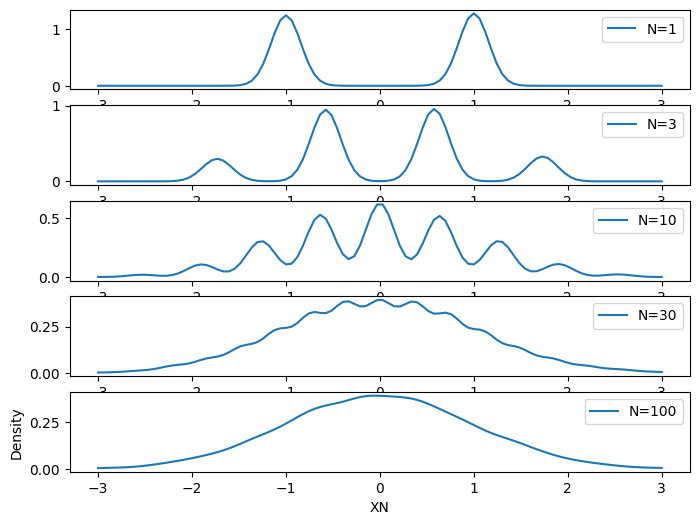

In [11]:
def draw_samples(M, N):
    samples = np.zeros(M)
    for i in range(M):
        xi = np.random.choice([-1, 1], size=N)
        XN = np.sum(xi) / np.sqrt(N)
        samples[i] = XN
    return samples

def plot_distribution(M, N_values):
    fig, axes = plt.subplots(len(N_values), 1, figsize=(8, 6))
    for i, N in enumerate(N_values):
        samples = draw_samples(M, N)
        density = gaussian_kde(samples)
        x = np.linspace(-3, 3, 100)
        axes[i].plot(x, density(x), label=f'N={N}')
        axes[i].legend()
    plt.xlabel('XN')
    plt.ylabel('Density')
    plt.show()

M = 10000 
N_values = [1, 3, 10, 30, 100]
plot_distribution(M, N_values)


# Ex.: 3.2

In [12]:
import pandas as pd

# Read the dataframe
df = pd.read_csv('temperature_data_processed.csv')

# Parse the date column into year, month and day
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Filter out missing data
df = df[df['temp'] != -999]
print(df.head())

   stationid  temp       date  time  year  month  day
0          3  -5.6 1891-01-01     7  1891      1    1
1          3  -0.7 1891-01-01    14  1891      1    1
2          3  -4.0 1891-01-01    21  1891      1    1
3          3  -5.2 1891-01-02     7  1891      1    2
4          3  -1.0 1891-01-02    14  1891      1    2


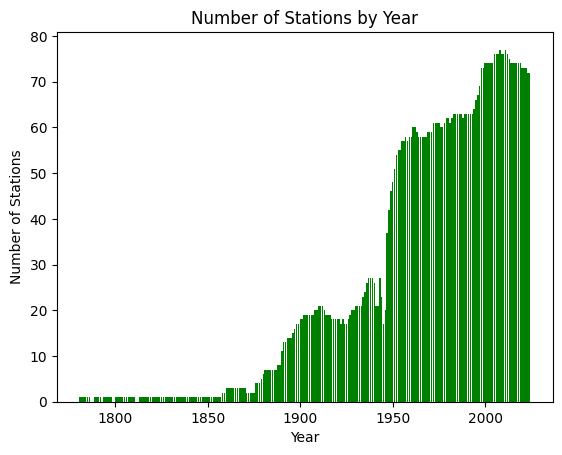

In [13]:
stations_by_year = df.groupby('year')['stationid'].nunique()
plt.bar(stations_by_year.index, stations_by_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.title('Number of Stations by Year')

plt.show()

In [14]:
active_stations_1900 = set(df[df['year'] == 1900]['stationid'])
active_stations_2020 = set(df[df['year'] == 2020]['stationid'])
reference_stations = active_stations_1900 & active_stations_2020  # Intersection of both sets

filtered_data = df[(df['stationid'].isin(reference_stations)) 
                   & (df['year'].between(1900, 2020)) 
                   & (df['month'].isin([6, 7, 8])) 
                   & (df['time'].isin([12, 14]))]
grouped_data = filtered_data.groupby('year')

## Another approach is below:

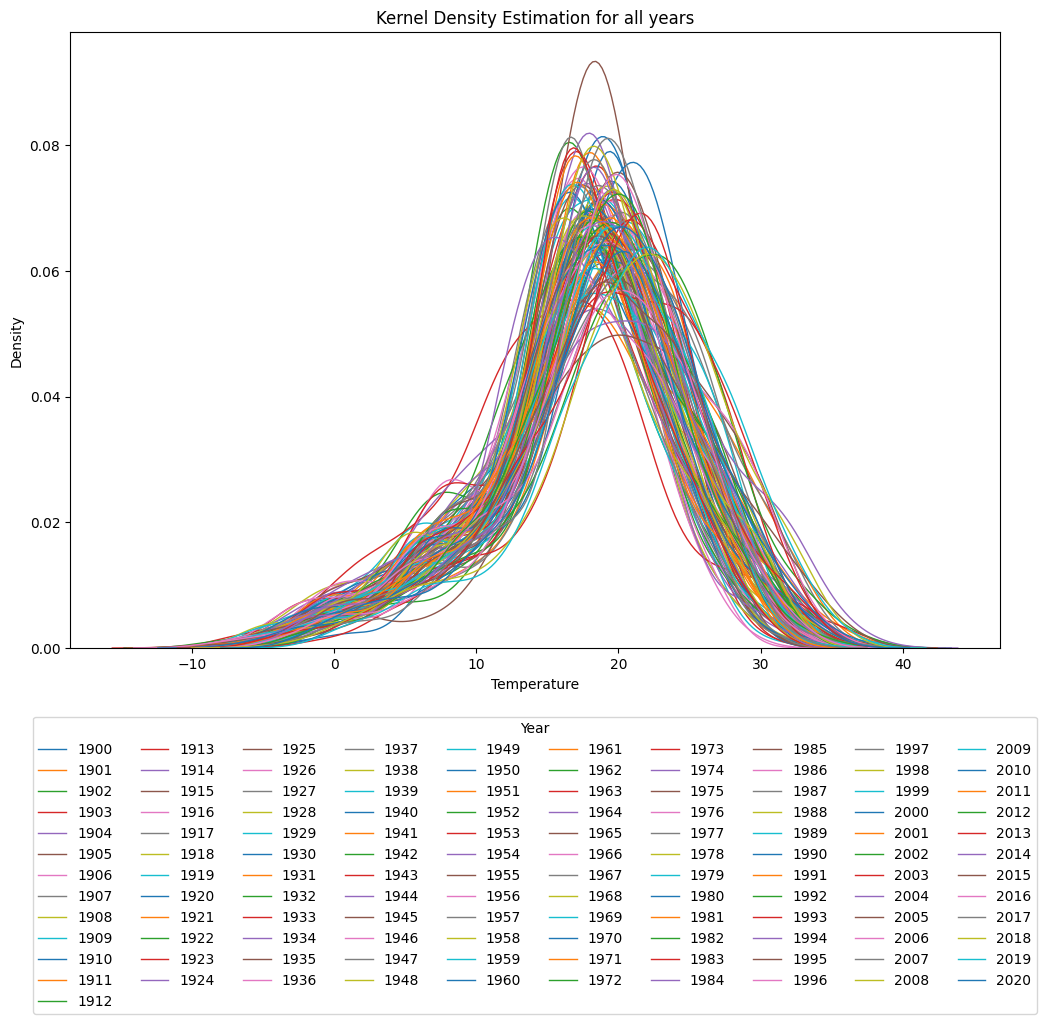

In [15]:
unique_years = np.sort(filtered_data['year'].unique())
plt.figure(figsize=(12, 8)) # Adjust the figure size as per your preference

for year in unique_years:
    data_for_year = filtered_data[filtered_data['year'] == year]['temp']
    sns.kdeplot(data_for_year, lw=1, label=f'{year}')

plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Kernel Density Estimation for all years')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=10, title="Year")  # Place the legend box outside the figure
plt.show()   

Split 1: [1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924]
Split 2: [1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938
 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948]
Split 3: [1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972]
Split 4: [1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996]
Split 5: [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


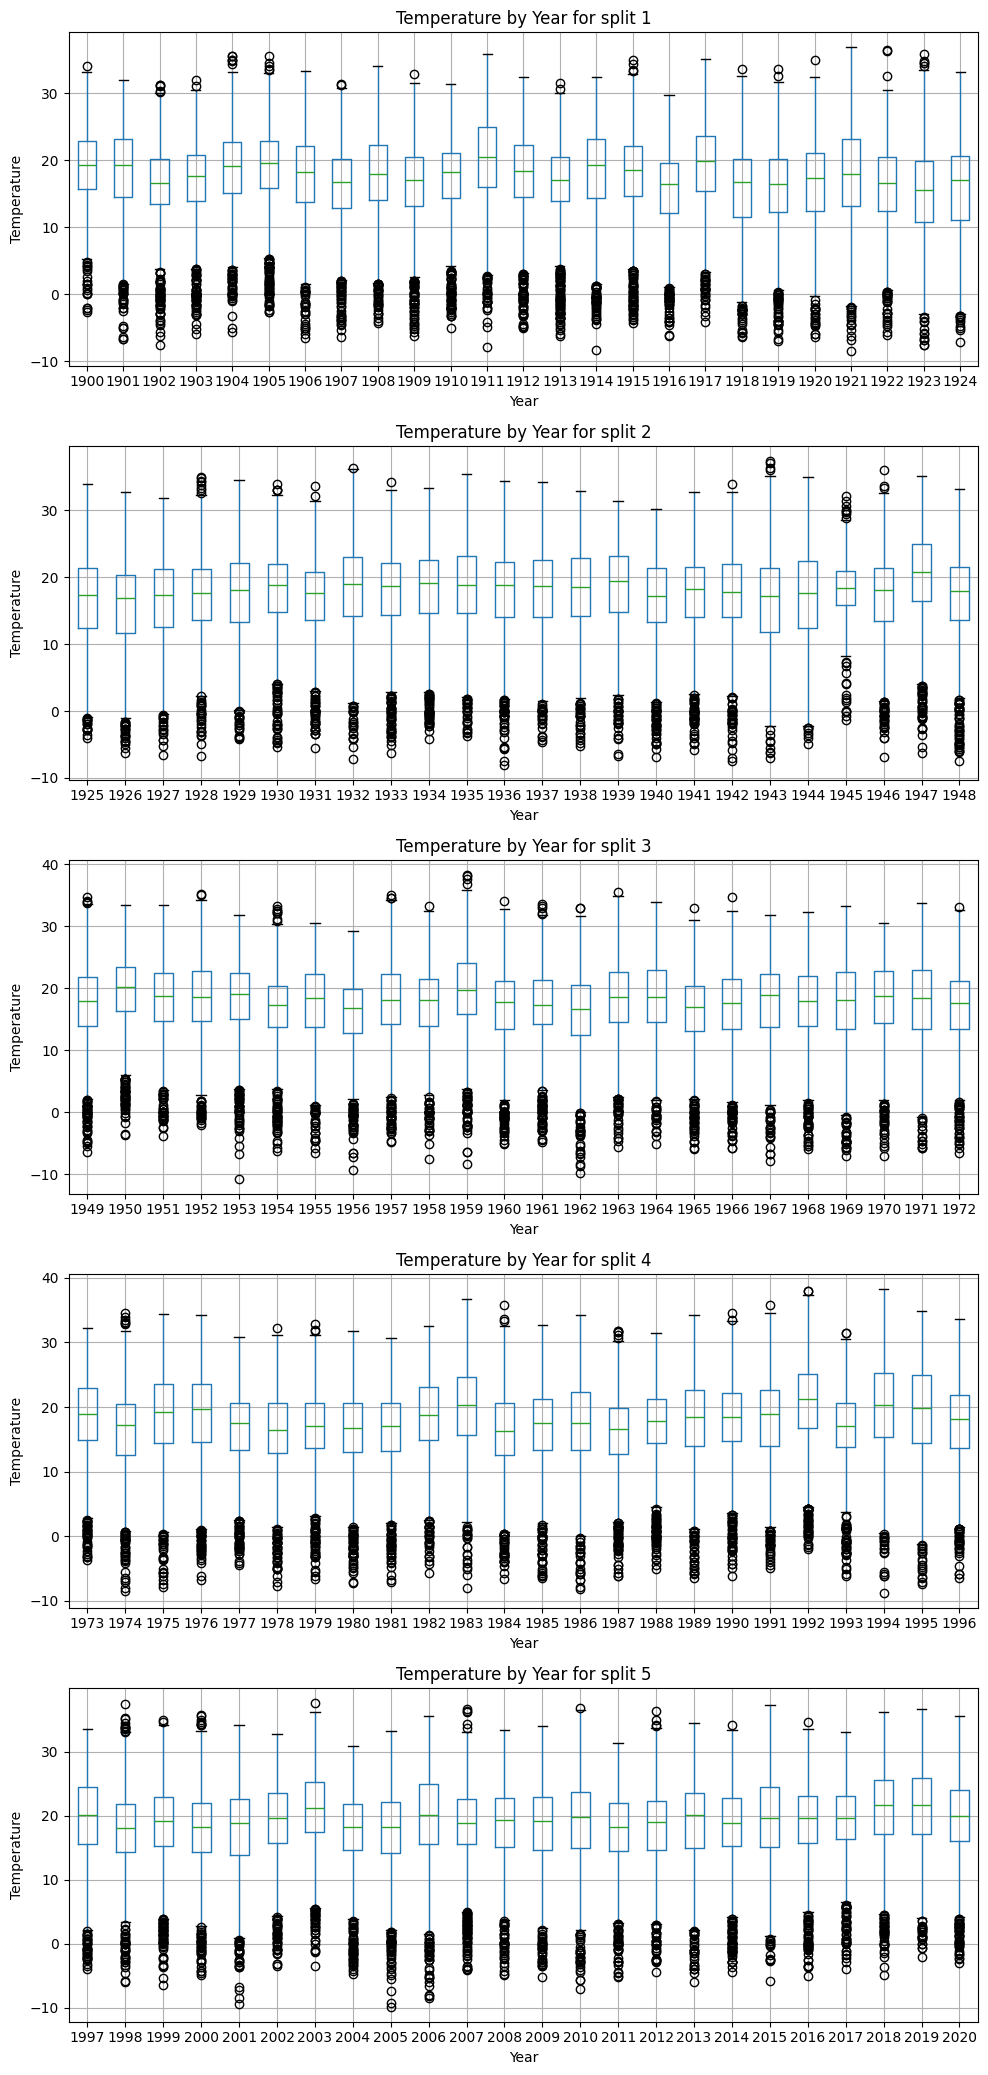

In [16]:

splits = np.array_split(unique_years, 5) 

for i, split in enumerate(splits, 1):
    print(f'Split {i}: {split}')

dataframes = []

for split in splits:
    split_df = filtered_data[filtered_data['year'].isin(split)]
    dataframes.append(split_df)


fig, axes = plt.subplots(5, 1, figsize=(10, 21)) # Creates a layout with 5 rows and 1 column. Figsize is adjusted for better visibility

for i in range(5):
    dataframes[i].boxplot(column='temp', by='year', ax=axes[i])
    fig.suptitle('') # Removes the default title
    axes[i].set_title(f'Temperature by Year for split {i+1}') 
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Temperature')

plt.tight_layout()
plt.show()